CC(=O)Oc1cccc(C(C)C(=O)O)c1


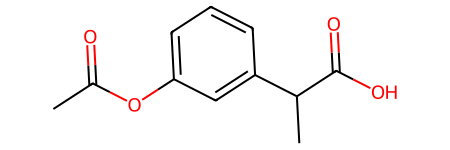

In [3]:
from rdkit import Chem

mol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC(=C1)C(C)C(=O)O')
print(Chem.MolToSmiles(mol))
mol

In [4]:
import pybel

def iupac_to_smiles(iupac_name):
    mol = pybel.readstring("name", iupac_name)
    return mol.write("smi").strip()

iupac_name = "4-aminobutyric acid"
smiles_string = iupac_to_smiles(iupac_name)
print(f"The SMILES string for {iupac_name} is {smiles_string}")

from py2opsin import py2opsin

smiles_string = py2opsin(
    chemical_name="4-aminobutyric acid",
    output_format="SMILES"
)
print(f"The SMILES string for 4-aminobutyric acid is {smiles_string}")


AttributeError: module 'pybel' has no attribute 'readstring'

In [17]:
import requests
from functools import cache

from urllib.request import urlopen
from urllib.parse import quote
import timeit 

@cache
def iupac_to_smiles1(iupac_name):
    if type(iupac_name) != str:
        return None
    iupac_name = iupac_name.strip()
    iupac_name = iupac_name.replace(' ', '-')
    try:
        url = f'http://cactus.nci.nih.gov/chemical/structure/{iupac_name}/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return None

@cache
def iupac_to_smiles2(iupac_name):
    '''
    This one is significantly better
    '''
    if type(iupac_name) != str:
        return None
    iupac_name = iupac_name.replace(' ', '-')
    iupac_name = iupac_name.strip('-')
    iupac_name = iupac_name.lstrip('(R/S)-').lstrip('(S/R)-')
    print(iupac_name)

    url = f"https://opsin.ch.cam.ac.uk/opsin/{iupac_name}.smi"
    response = requests.get(url)
    print(response)
    if response.status_code == 200:
        return response.text.strip()
    return None

iupac_name = "(R/S)-4-amino-3-hydroxy butyric acid"
smiles = iupac_to_smiles2(iupac_name)
smiles

4-amino-3-hydroxy-butyric-acid
<Response [200]>


'NCC(CC(=O)O)O'

In [18]:
import pandas as pd

data = pd.read_csv(r'../SURP-database-reformatted - Flexizymes ready for database.csv', skiprows=1)

SMILES = []
for iupac in data['Monomer Names (required)']:
    method2 = iupac_to_smiles2(iupac)
    if method2: 
        SMILES.append({
            'IUPAC': iupac,
            'SMILES2': method2
        })

4-aminobutyric-acid
<Response [200]>
3-aminocyclohexane)carboxylic-acid,
<Response [404]>
3S,4S)-4-amino-3-hydroxy-6-methylheptanoic-acid
<Response [404]>
3S,4R)-4-amino-3-hydroxy-5-methylhexanoic-acid
<Response [404]>
3S,4R)-4-amino-3-hydroxy-5-phenylpentanoic-acid
<Response [404]>
Benzenepropanoic-Acid-CME
<Response [404]>
Cinnamic-Acid-CME
<Response [404]>
Benzoic-Acid-CME
<Response [404]>
Phenyl-Acetic-Acid-CME
<Response [404]>
3,4-dihydroxy-Benzenepropanoic-Acid-CME
<Response [404]>
Pyrrolepropanoic-Acid-CME
<Response [404]>
4-Amino-Benzenepropanoic-Acid-CME
<Response [404]>
3,4-dihydroxycinnamic-Acid-CME
<Response [404]>
Pyrrole-Propenoic-Acid-CME
<Response [404]>
4-Azido-Benzenepropanoic-Acid-CME
<Response [404]>
p-NO2-Bz-CME
<Response [404]>
p-CN-Bz-CME
<Response [404]>
p-N3-Bz-CME
<Response [404]>
m-CHO-Bz-CME
<Response [404]>
m-NO2-CH2-Bz-CME
<Response [404]>
o-F-Bz-CME
<Response [404]>
o-I-Bz-CME
<Response [404]>
o-CHO-Bz-CME
<Response [404]>
p-Methoxy-Bz-CME
<Response [404]

In [3]:
# put into new csv
SMILES_df = pd.DataFrame(SMILES)
SMILES_df.to_csv('IUPAC_TO_SMILES.csv')

NameError: name 'pd' is not defined